<a href="https://colab.research.google.com/github/este7734/Project_DS_Tools/blob/master/German_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Tools and Techniques

# Natural Language Processing Exercise

Perform the tasks below to demonstrate your understanding of NLP.  You may reference the TextBlob documentation here:

https://textblob.readthedocs.io/en/dev/

Natural Language Processing is a very versatile tool in data science.  Among other things, it can be used to quantitate the affect, or emotional content, of text.  This technique is called sentiment analysis, and is often used in industry to measure how customers feel about a particular company or product.

Sputnik is a Russian media outlet.  In this exercise, you will measure the sentiment of an English-language Sputnik article that mentions a U.S. political candidates.

In the space below, specify the location of the news_text.txt file:

### Save Text Files to Your Temporary Colab folder

In [218]:
%ls # List files in the your temporary folder to verify they are there.

news_text.txt  sample_data/


### Read in File(s) to Colab Environment

In [29]:
file1 = 'Spiegel_DuetcheBank_Trump.txt'
file2 = 'Spiegel_Iran_Protests.txt'
file3 = 'Spiegel_Trump_Peace_Plan.txt'

file4 = 'Zeit_URL_1_Holocaust'
file5 = 'Zeit_URL_2_xenophobic_politicians'
file6 = 'Zeit_URL_3_NATO_Germany_contribution'

file7 = 'news_text.txt'


print(file7)

#file_path = r'C:\Users\student\Desktop\404_is_Found\Sessions\Sessions 3 & 4\news_text.txt'
file_path = r'news_text.txt'
#file_path = r', (file7)

file_path

news_text.txt


'news_text.txt'

In [0]:
#open text
def open_text(file_path):
    with open(file_path, 'r') as document:
        text = document.read()
    return text

In [31]:
text = open_text(file_path)
text

'Former Vice President Joe Biden is considered to be the frontrunner in the US Democratic primaries despite his controversial performance during the second debate in August and a recently emerged scandal about him allegedly meddling in Ukrainian internal affairs to save his son from potential prosecution. In his latest appeal to US voters to support his election campaign, Vermont Senator Bernie Sanders has accused former Vice President Joe Biden and his allies of trying to "buy" the Democratic primaries. "It should not be a surprise that wealthy donors of the political establishment are trying to buy this election. Now we need to be ready for when they do", he said. The senator referred to a recent The New York Times article claiming that Biden\'s allies believe that the former vice president won\'t be able to win his campaign without the use of so-called Super Political Action Committees (Super PACs). Sanders claimed that such actions endanger his campaign and the entire US. "Super PA

## Import Dependencies

In [489]:
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt

# Import these dependencies if using Google Colab 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Ingest Text to Analyze

In [0]:
blob = TextBlob(text)

Now that you have instatiated your text as a TextBlob object, you can perform text manipulations.  First, let's generate a list of all sentences in your TextBlob object:

blob_sentences = blob.sentences

Do this in the space below, and print the result (you should see a list of sentences):

In [0]:
blob_sentences = blob.sentences

In [198]:
# Allow user to type in key words to search the text for
filter_list = input('Enter words to filter by separated by commas: ').title() # This is still a string... not a list yet

Enter words to filter by separated by commas: biden,trump,sanders,putin


### Enter Key Words to Search in Text

In [199]:
fliter_list = list(filter_list) # Convert string to a list (it currently has 1 long string element of key words)

f = []
for word in (filter_list.split(",")):  # Split string into separate words, separate by comma
  f.append(word)                       # Generate new list containing each key word
f # This is now a list of key words that the user typed in

['Biden', 'Trump', 'Sanders', 'Putin']

## Search Sentences for Key Words

In [209]:
# Instantiate list for holding the sentences
sentences = []

# Generate empty list of lists 
for i in range(len(f)):
  sentences.append([])
print('Here is what you just made, and empty list of lists: ', sentences, '\n')

# Generate lists of sentences for each key word and plug them into the list of lists from above            
for i in range(len(f)):
  for sentence in blob_sentences:
    if f[i] in sentence:
        sentences[i].append(sentence)
        
# Print number of sentences containing each key word
# Print out all sentences containing each key word
for i in range(len(f)):
  print('-----------------------------------------------------------------')   
  print('There are {} sentences in containing the word: {} '.format(len(sentences[i]), f[i]), '\n') 
  for sentence in sentences[i]:
      print(sentence)


Here is what you just made, and empty list of lists:  [[], [], [], []] 

-----------------------------------------------------------------
There are 6 sentences in containing the word: Biden  

Former Vice President Joe Biden is considered to be the frontrunner in the US Democratic primaries despite his controversial performance during the second debate in August and a recently emerged scandal about him allegedly meddling in Ukrainian internal affairs to save his son from potential prosecution.
In his latest appeal to US voters to support his election campaign, Vermont Senator Bernie Sanders has accused former Vice President Joe Biden and his allies of trying to "buy" the Democratic primaries.
The senator referred to a recent The New York Times article claiming that Biden's allies believe that the former vice president won't be able to win his campaign without the use of so-called Super Political Action Committees (Super PACs).
Sanders asked his supporters to "chip in what they can" in



---







In [248]:
sentences[0][0].sentiment

Sentiment(polarity=0.0642857142857143, subjectivity=0.32857142857142857)

In [241]:
blob
type(blob)

textblob.blob.TextBlob

In [238]:
print('Article', blob.sentiment) # Overall article sentiment

Article Sentiment(polarity=0.1398268398268398, subjectivity=0.427763515554213)


In [405]:
# Print out sentiment values for each key word
print('Sentence | Objectivity | Polarity | Sentiment | Avg Sentiment')
for i in range(len(f)):
  print('\n----------------------', f[i], '--------------------------------')
  for j in range(len(sentences[i])):
    print(j, '       |', round(sentences[i][j].sentiment[0], 3), '       |', round(sentences[i][j].sentiment[1], 3), '    |', round(sentences[i][j].sentiment[0] * sentences[i][j].sentiment[1], 3), '|', 'avg')
  print('=============================================================')

Sentence | Objectivity | Polarity | Sentiment | Avg Sentiment

---------------------- Biden --------------------------------
0        | 0.064        | 0.329     | 0.021 | avg
1        | 0.25        | 0.45     | 0.113 | avg
2        | 0.245        | 0.363     | 0.089 | avg
3        | 0.111        | 0.722     | 0.08 | avg
4        | 0.333        | 0.667     | 0.222 | avg
5        | -0.007        | 0.362     | -0.003 | avg

---------------------- Trump --------------------------------

---------------------- Sanders --------------------------------
0        | 0.25        | 0.45     | 0.113 | avg
1        | 0.0        | 0.562     | 0.0 | avg
2        | 0.111        | 0.722     | 0.08 | avg
3        | -0.007        | 0.362     | -0.003 | avg

---------------------- Putin --------------------------------


In [399]:
print(sentences[0][0].sentiment)
print(np.average(sentences[0][0].sentiment))
print(round(np.average(sentences[0][0].sentiment), 3))

Sentiment(polarity=0.0642857142857143, subjectivity=0.32857142857142857)
0.19642857142857142
0.196


In [484]:
sentiment = [[],[],[],[],[],[]]
for i in range(len(f)):
  try:
    for j in range(len(sentences[i])):
      sentiment[i].append(sentences[i][j].sentiment[0] * sentences[i][j].sentiment[1])  
      np.average(sentiment[i]) 
  except:
    print('The List is Empty')
  print(i, np.average(sentiment[i])) 

0 0.08704166966472561
1 nan
2 0.04754046989166037
3 nan


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [487]:
print('1', np.average(sentiment[0]))
print('2', np.average(sentiment[1]))
print('3', np.average(sentiment[2]))
print('4', np.average(sentiment[3]))

1 0.08704166966472561
2 nan
3 0.04754046989166037
4 nan


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Plot Resutls

---



In [542]:
xaxis1 = []
for i in range(len(sentiment[0])): # sentiment[0] is the list of sentiments for the first key word
  xaxis1.append(i)
print("The xaxis is {}.".format(xaxis1))

The xaxis is [0, 1, 2, 3, 4, 5].


In [539]:
xaxis2 = []
for i in range(len(sentiment[2])): # sentiment[0] is the list of sentiments for the first key word
  xaxis2.append(i)
print("The xaxis is {}.".format(xaxis2))

The xaxis is [0, 1, 2, 3].


NameError: ignored

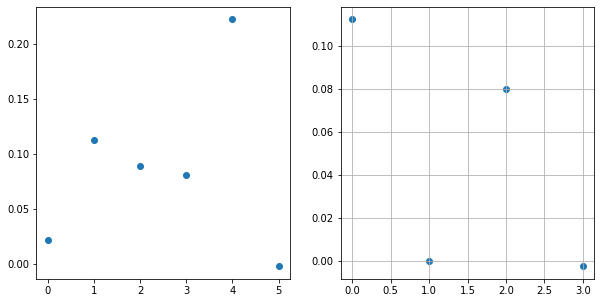

In [571]:
x1 = xaxis1 
x2 = xaxis2
y1 = sentiment[0]
y2 = sentiment[2]

fit, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
plt.grid()
axes[0].scatter(x1,y1)
#plt.grid()
axes[1].scatter(x2,y2)


fig.tight_layout()

IndexError: ignored

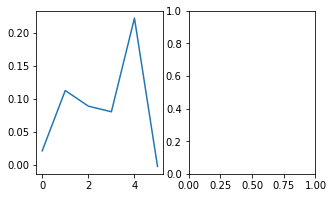

In [549]:

x1 = xaxis1 
x2 = xaxis2
y1 = sentiment[0]
y2 = sentiment[2]

fit, axes = plt.subplots(nrows=1, ncols=2,figsize=(5,3))
axes[0].plot(x1,y1)
axes[2].plot(x2,y2)

# First Subplot
#plt.subplot(1,2,1)
plt.scatter(x1, y1)
plt.grid()
plt.title(f[0] + ' Sentiment Per Sentence', color='w')
plt.ylabel('Sentiment', color='w')
plt.yticks(color='w')
plt.ylim(-1,1)

# Second Subplot
#plt.subplot(1,2,2) 
plt.scatter(x2, y2)
plt.grid()
plt.title(f[2] + ' Sentiment Per Sentence', color='w')
plt.xticks(color='w')

plt.xlabel('Sentence', color='w')
plt.ylabel('Sentiment', color='w')

plt.yticks(color='w')
plt.ylim(-1,1)

plt.tight_layout() # This spaces the graphs out

In [573]:
xaxis = []
for i in range(len(sentiment[0])): # sentiment[0] is the list of sentiments for the first key word
  xaxis.append(i)
print("The xaxis is {}.".format(xaxis))

The xaxis is [0, 1, 2, 3, 4, 5].


(-1.0, 1.0)

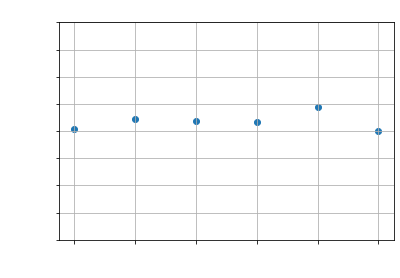

In [575]:
plt.scatter(xaxis, sentiment[0])
plt.grid()
plt.title(f[0] + ' Sentiment Per Sentence', color='w')
plt.xlabel('Sentence', color='w')
plt.ylabel('Sentiment', color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylim(-1,1)

In [514]:
xaxis = []
for i in range(len(sentiment[2])): # sentiment[0] is the list of sentiments for the first key word
  xaxis.append(i)
print("The xaxis is {}.".format(xaxis))

The xaxis is [0, 1, 2, 3].


(-1.0, 1.0)

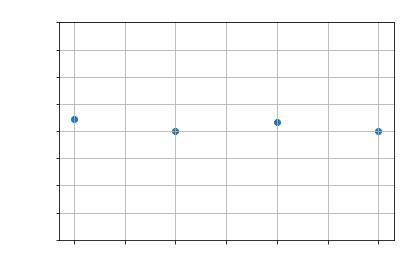

In [515]:
plt.scatter(xaxis, sentiment[2])
plt.grid()
plt.title(f[2] + ' Sentiment Per Sentence', color='w')
plt.xlabel('Sentence', color='w')
plt.ylabel('Sentiment', color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylim(-1,1)